In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import json

In [2]:
with open("ratios.json",'r') as f:
    ratios = json.load(f)

In [3]:
subtract = np.array([float(a)/float(b) for a, b in ratios])
print(subtract.mean())
print(subtract.std())

7.374161118369119
0.7337263284487616


In [4]:
subtract

array([7.63017179, 7.52178746, 6.8298339 , 6.87874496, 9.31266356,
       6.56965005, 6.97986341, 6.99541074, 7.59133315, 7.43215216])

{'whiskers': [<matplotlib.lines.Line2D at 0x7eff83a431c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7eff83a43880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eff83ab5e20>],
 'medians': [<matplotlib.lines.Line2D at 0x7eff83a43f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7eff83a4e5e0>],
 'means': [<matplotlib.lines.Line2D at 0x7eff83a4e280>]}

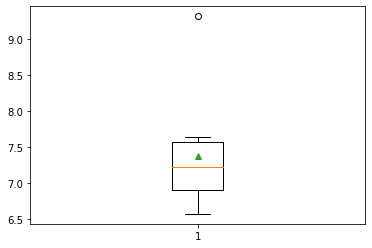

In [14]:
plt.boxplot(subtract, showmeans=True, showfliers= True)